# Pandas Notes

This book contain material about pandas DataFrame and how to work with it, clean data, fix wrong format and etc, because of that, we need to import several things like: the pandas, numpy, and maybe more for help in the top of the book for other subsequent cells to use.

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

## Pandas Useful
For NaN values (e.g. empty cells) pandas DataFrame have the function `dropna`

## Examples

In [62]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [25, np.nan, 30, 22, 28],
    'City': ['New York', 'Los Angeles', None, 'Chicago', 'Miami']
})

print("Original DataFrame:")
print(df)

# Drop rows with any NaN values
clean_df = df.dropna()

print("\nDataFrame after dropna():")
print(clean_df)


Original DataFrame:
      Name   Age         City
0    Alice  25.0     New York
1      Bob   NaN  Los Angeles
2  Charlie  30.0         None
3    David  22.0      Chicago
4     None  28.0        Miami

DataFrame after dropna():
    Name   Age      City
0  Alice  25.0  New York
3  David  22.0   Chicago


## Pandas Useful
For removing the rows with empty cells in the original data frame you can use `inplace=True` parameter of the function `dropna()`

## Example

In [61]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [25, np.nan, 30, 22, 28],
    'City': ['New York', 'Los Angeles', None, 'Chicago', 'Miami']
})

print("Original DataFrame:")
print(df)

# Drop rows with any NaN values of the original data frame.
df.dropna(inplace=True)

print("\nDataFrame after dropna(inplace=True):")
print(df)

Original DataFrame:
      Name   Age         City
0    Alice  25.0     New York
1      Bob   NaN  Los Angeles
2  Charlie  30.0         None
3    David  22.0      Chicago
4     None  28.0        Miami

DataFrame after dropna(inplace=True):
    Name   Age      City
0  Alice  25.0  New York
3  David  22.0   Chicago


## Pandas Useful
For replace empty cells withing or without replacing the original data frame you can use `fillna()` funciton the same manner as using `dropna()`

## Example

In [60]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [25, np.nan, 30, 22, 28],
    'City': ['New York', 'Los Angeles', None, 'Chicago', 'Miami']
})

print("Original DataFrame:")
print(df)

# Fill rows with any NaN values of the original data frame.
filled_copy = df.fillna(value='Blob')

print("\nDataFrame after fillna():")
print(filled_copy)

# Fill in place
df.fillna(value='Blob', inplace=True)

print("\nDataFrame after fillna(inplace=True):")
print(df)


Original DataFrame:
      Name   Age         City
0    Alice  25.0     New York
1      Bob   NaN  Los Angeles
2  Charlie  30.0         None
3    David  22.0      Chicago
4     None  28.0        Miami

DataFrame after fillna():
      Name   Age         City
0    Alice  25.0     New York
1      Bob  Blob  Los Angeles
2  Charlie  30.0         Blob
3    David  22.0      Chicago
4     Blob  28.0        Miami

DataFrame after fillna(inplace=True):
      Name   Age         City
0    Alice  25.0     New York
1      Bob  Blob  Los Angeles
2  Charlie  30.0         Blob
3    David  22.0      Chicago
4     Blob  28.0        Miami


/var/folders/h4/xsfstpkn5m7fgnq5jwb1hhsc0000gn/T/ipykernel_6018/3596348151.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Blob' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(value='Blob', inplace=True)


## Pandas Useful
You can replace in several ways the wrong format or the empty cells, you can use `pd.to_datetime()` for example to fix datetime values in some datetime column, and combine it with `dropna()` to get rid of empty cells (To not have NaT, Not a Time), and etc..

# Example

In [59]:
df = pd.DataFrame({
    'log_time': pd.date_range('2024-01-01', periods=100, freq='h'),
    'process_name': np.random.choice(['web_server', 'database', 'auth_service', 'file_system'], 100),
    'log_level': np.random.choice(['INFO', 'WARNING', 'ERROR', 'DEBUG'], 100)
})

print("\nOriginal DataFrame:")
print(df.to_string())  ## to_string will give the full output while the __str__ / __reper__ will print truncated version for preview data

# Making cell wrong format
df['log_time'] = df['log_time'].astype('object')
df.loc[3, 'log_time'] = "1/15/2024"

print("\nAfter change:")
print(df)

print("\nAfter fix:")
fixed = pd.to_datetime(df['log_time'])
print(fixed)

# Fix manually - for small cases
random_date = pd.Timestamp('2024-01-01') + pd.Timedelta(days=np.random.randint(0, 366), 
                                                         hours=np.random.randint(0, 24),
                                                         minutes=np.random.randint(0, 60))
df.loc[3, 'log_time'] = random_date
print('\nAfter fix:')
print(df)


# Making multiple wrong values for simulating big case
rate_col = pd.Series(data=[120,110,100,321,324,435, 342,100,102,94,98])
df['Rating']= rate_col
df['Rating'].fillna(value=100, inplace=True)
print("\nInserting new col with multiple wrong values:")  # Should be below or equal to 120 anything above should be 120 
print(df)

for x in df.index:
    if df.loc[x, 'Rating'] > 120:
        df.loc[x, 'Rating'] = 120

print("\nAfter fix for several cells (big case):")
print(df)



Original DataFrame:
              log_time  process_name log_level
0  2024-01-01 00:00:00   file_system     DEBUG
1  2024-01-01 01:00:00  auth_service     DEBUG
2  2024-01-01 02:00:00    web_server   WARNING
3  2024-01-01 03:00:00      database   WARNING
4  2024-01-01 04:00:00   file_system     ERROR
5  2024-01-01 05:00:00      database      INFO
6  2024-01-01 06:00:00   file_system     DEBUG
7  2024-01-01 07:00:00  auth_service     DEBUG
8  2024-01-01 08:00:00    web_server      INFO
9  2024-01-01 09:00:00    web_server     DEBUG
10 2024-01-01 10:00:00      database     DEBUG
11 2024-01-01 11:00:00    web_server      INFO
12 2024-01-01 12:00:00      database     ERROR
13 2024-01-01 13:00:00      database      INFO
14 2024-01-01 14:00:00      database   WARNING
15 2024-01-01 15:00:00   file_system     ERROR
16 2024-01-01 16:00:00    web_server   WARNING
17 2024-01-01 17:00:00  auth_service     DEBUG
18 2024-01-01 18:00:00    web_server   WARNING
19 2024-01-01 19:00:00  auth_service   

/var/folders/h4/xsfstpkn5m7fgnq5jwb1hhsc0000gn/T/ipykernel_6018/3079074271.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(value=100, inplace=True)


## Pandas Useful
For easy viewing and removing duplicates the user can use either of the two: `duplicated()`, `drop_duplicates()`

## Example

In [58]:
# DataFrame with multiple duplicated rows
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Alice', 'Charlie', 'Bob', 'Alice', 'David', 'Bob'],
    'Age': [25, 30, 25, 35, 30, 25, 28, 30],
    'City': ['NYC', 'LA', 'NYC', 'Chicago', 'LA', 'NYC', 'Boston', 'LA'],
    'Salary': [50000, 60000, 50000, 70000, 60000, 50000, 55000, 60000]
})

print('\nOriginal DataFrame:')
print(df)

print('\nViewing Duplicates:')
print(df.duplicated())

print('\nAfter remove duplicates:')
df.drop_duplicates()  # WARNING! drop_duplicated works like inplace=True
print(df)


Original DataFrame:
      Name  Age     City  Salary
0    Alice   25      NYC   50000
1      Bob   30       LA   60000
2    Alice   25      NYC   50000
3  Charlie   35  Chicago   70000
4      Bob   30       LA   60000
5    Alice   25      NYC   50000
6    David   28   Boston   55000
7      Bob   30       LA   60000

Viewing Duplicates:
0    False
1    False
2     True
3    False
4     True
5     True
6    False
7     True
dtype: bool

After remove duplicates:
      Name  Age     City  Salary
0    Alice   25      NYC   50000
1      Bob   30       LA   60000
2    Alice   25      NYC   50000
3  Charlie   35  Chicago   70000
4      Bob   30       LA   60000
5    Alice   25      NYC   50000
6    David   28   Boston   55000
7      Bob   30       LA   60000


## Pandas Useful
For calculating relationships between columns in your dataset you can have `corr()` function, use wisely :)

### Note
`corr()` method ignores not numeric columns

### Results Explained
The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

What is a good correlation? It depends on the use, but I think it is safe to say you have to have at least 0.6 (or -0.6) to call it a good correlation.

#### Perfect Correlation:
We can see that "Duration" and "Duration" got the number 1.000000, which makes sense, each column always has a perfect relationship with itself.

#### Good Correlation:
"Duration" and "Calories" got a 0.922721 correlation, which is a very good correlation, and we can predict that the longer you work out, the more calories you burn, and the other way around: if you burned a lot of calories, you probably had a long work out.

#### Bad Correlation:
"Duration" and "Maxpulse" got a 0.009403 correlation, which is a very bad correlation, meaning that we can not predict the max pulse by just looking at the duration of the work out, and vice versa.

## Example

In [57]:
df = pd.read_csv("~/Desktop/Projects/AiDegree/AiDegree/aidegree/sem1/week1_python_math/lesson2/data.csv")
print('\nOriginal DataFrame:')
print(df)

print('\nShow corelation:')
print(df.corr())


Original DataFrame:
     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]

Show corelation:
          Duration     Pulse  Maxpulse  Calories
Duration  1.000000 -0.155408  0.009403  0.922717
Pulse    -0.155408  1.000000  0.786535  0.025121
Maxpulse  0.009403  0.786535  1.000000  0.203813
Calories  0.922717  0.025121  0.203813  1.000000


## Pandas Useful
For ploting pandas data frames we can use `plot()` method to create a diagram out of the data frame.
Then, we can use `pyplot` of `matplotlib` to visualize it.

## Example

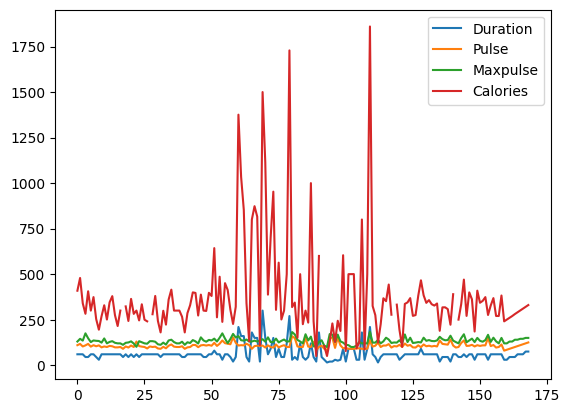

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv("~/Desktop/Projects/AiDegree/AiDegree/aidegree/sem1/week1_python_math/lesson2/data.csv")
df.plot()  # plot the data frame using plot() method, open a figure behind the scenes

plt.show()  # show the plot

## Pandas Useful
Scattering can be used to further investigate and see collerations as need.
Can use scatter by using `kind` param inside the plot (plot kind)

## Example

          Duration     Pulse  Maxpulse  Calories
Duration  1.000000 -0.155408  0.009403  0.922717
Pulse    -0.155408  1.000000  0.786535  0.025121
Maxpulse  0.009403  0.786535  1.000000  0.203813
Calories  0.922717  0.025121  0.203813  1.000000

Correlation between Duration and Calories (Good correlation):


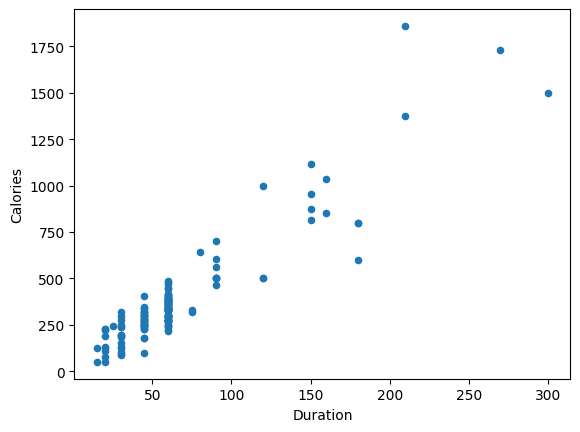


Correlation between Duration and Duration (Perfect correlation):


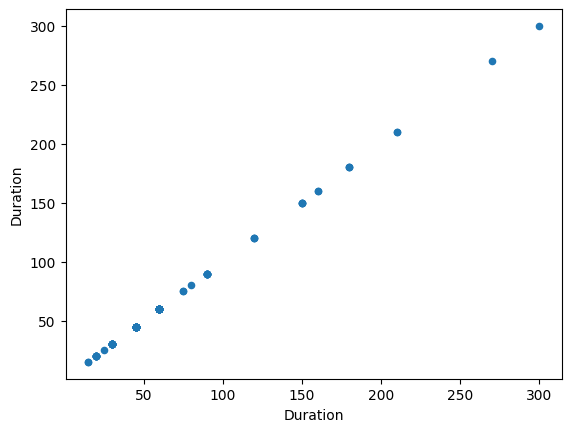


Correlation between Duration and Maxpulse (Bad correlation):


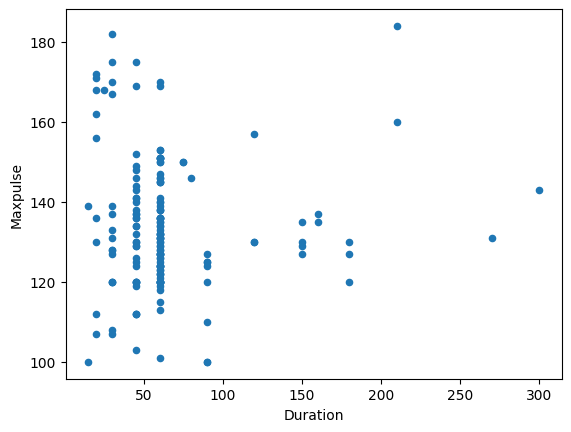

In [9]:
import matplotlib.pyplot as plt

df = pd.read_csv("~/Desktop/Projects/AiDegree/AiDegree/aidegree/sem1/week1_python_math/lesson2/data.csv")
df.plot(kind='scatter', x='Duration', y='Calories')  # See correlation between Duration and Calories   # show the plot

print(df.corr())

print("\nCorrelation between Duration and Calories (Good correlation):")
plt.show()

print("\nCorrelation between Duration and Duration (Perfect correlation):")
df.plot(kind='scatter', x='Duration', y='Duration')
plt.show()

print("\nCorrelation between Duration and Maxpulse (Bad correlation):")
df.plot(kind='scatter', x='Duration', y='Maxpulse')
plt.show()

## Pandas Useful
Using Histograms, can be used by using again the `kind` param in the plot method, but with the equal `hist`.

## Example

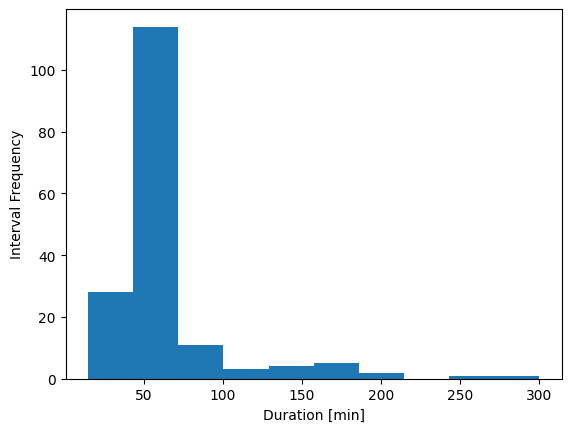

In [20]:
import matplotlib.pyplot as plt

df = pd.read_csv("~/Desktop/Projects/AiDegree/AiDegree/aidegree/sem1/week1_python_math/lesson2/data.csv")

# A histogram shows us the frequency of each interval, e.g. how many workouts lasted between 50 and 60 minutes?
df['Duration'].plot(kind='hist') 

plt.ylabel('Interval Frequency')
plt.xlabel('Duration [min]')
plt.show()
